In [253]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier


In [254]:
df=pd.read_csv('dataset.csv')
df.head()

,0.7506148219108582,0.4541923403739929,-4.551418157916487e-07,0.6922282576560974,0.4316278100013733,-0.012856105342507362,0.6535598039627075,0.37891101837158203,-0.016472220420837402,0.641838788986206,...,0.7702736854553223,0.2733306586742401,-0.019555620849132538,0.7621660828590393,0.30692264437675476,-0.010888839140534401,0.7602875232696533,0.3287830352783203,-0.000840017746668309,A
0,0.749700,0.452150,-4.245076e-07,0.692843,0.429316,-0.012199,0.654466,0.377049,-0.015699,0.642554,...,0.769556,0.271629,-0.019320,0.761992,0.303831,-0.010981,0.760670,0.327484,-0.000998,A
1,0.749700,0.452150,-4.245076e-07,0.692843,0.429316,-0.012199,0.654466,0.377049,-0.015699,0.642554,...,0.769556,0.271629,-0.019320,0.761992,0.303831,-0.010981,0.760670,0.327484,-0.000998,A
2,0.747707,0.449032,-4.582683e-07,0.691615,0.428373,-0.013196,0.653445,0.373605,-0.017139,0.642533,...,0.767178,0.272710,-0.024520,0.760342,0.307854,-0.015635,0.759467,0.328237,-0.005095,A
3,0.747707,0.449032,-4.582683e-07,0.691615,0.428373,-0.013196,0.653445,0.373605,-0.017139,0.642533,...,0.767178,0.272710,-0.024520,0.760342,0.307854,-0.015635,0.759467,0.328237,-0.005095,A
4,0.746994,0.450529,-4.575104e-07,0.692274,0.430419,-0.013316,0.653306,0.374857,-0.016407,0.641500,...,0.766083,0.272272,-0.020293,0.760328,0.308235,-0.011354,0.758986,0.327371,-0.000677,A


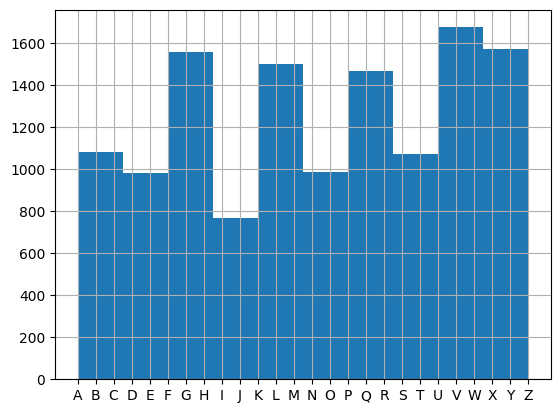

In [255]:
df[df.columns[-1]].hist()
plt.show()

In [256]:
x=df[df.columns[0:63]]
x.shape

(12648, 63)

In [257]:
y=df[df.columns[-1]]
y.shape

(12648,)

In [258]:
seed=12
train_x,test_x,train_y,test_y=train_test_split(
    x,y,train_size=0.8,random_state=seed,stratify=y
)
model_res=[[],[],[]]

SVM

In [259]:
svm = SVC(C=9,kernel='rbf')
svm.fit(train_x, train_y)

SVC(C=9)

In [260]:
test_y_svm=svm.predict(test_x)
train_y_svm=svm.predict(train_x)

In [261]:
acc_train_svm=accuracy_score(train_y,train_y_svm)
acc_test_svm=accuracy_score(test_y,test_y_svm)

model_res[0].append("SVM")
model_res[1].append(acc_train_svm)
model_res[2].append(acc_test_svm)

acc_train_svm,acc_test_svm

(0.9870527772287013, 0.9857707509881423)

XGB Classifier

In [262]:
xgb=XGBClassifier(objective='multi:softprob',max_depth=7)
le=LabelEncoder()
le_train_y=le.fit_transform(train_y)
le_test_y=le.fit_transform(test_y)
xgb.fit(train_x,le_train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [263]:
test_y_xgb = xgb.predict(test_x)
train_y_xgb = xgb.predict(train_x)

In [264]:
acc_train_xgb=accuracy_score(le_train_y,train_y_xgb)
acc_test_xgb=accuracy_score(le_test_y,test_y_xgb)

model_res[0].append("XGB")
model_res[1].append(acc_train_xgb)
model_res[2].append(acc_test_xgb)

acc_train_xgb,acc_test_xgb

(1.0, 0.9952569169960475)

Using Neural Network

In [265]:
mlp=MLPClassifier(hidden_layer_sizes=(50,50),max_iter=1000)
mlp.fit(train_x,train_y)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

In [266]:
train_y_mlp=mlp.predict(train_x)
test_y_mlp=mlp.predict(test_x)

In [267]:
acc_train_mlp=accuracy_score(train_y,train_y_mlp)
acc_test_mlp=accuracy_score(test_y,test_y_mlp)

model_res[0].append("MLP")
model_res[1].append(acc_train_mlp)
model_res[2].append(acc_test_mlp)

acc_train_mlp,acc_test_mlp

(0.9990116623838703, 0.9972332015810277)

KNeighbours Classifier

In [268]:
knc=KNeighborsClassifier()
knc.fit(train_x,train_y)

KNeighborsClassifier()

In [269]:
train_y_knc=knc.predict(train_x)
test_y_knc=knc.predict(test_x)

In [270]:
acc_train_knc=accuracy_score(train_y,train_y_knc)
acc_test_knc=accuracy_score(test_y,test_y_knc)

model_res[0].append("KNC")
model_res[1].append(acc_train_knc)
model_res[2].append(acc_test_knc)

acc_train_knc,acc_test_knc

(0.9933781379719312, 0.9905138339920949)

In [271]:
res=pd.DataFrame(data=np.transpose(model_res),columns=["Model","train accuracy","test accuracy"])
res.sort_values(by=["test accuracy","train accuracy"],ascending=False)

,Model,train accuracy,test accuracy
2,MLP,0.9990116623838703,0.9972332015810277
1,XGB,1.0,0.9952569169960475
3,KNC,0.9933781379719312,0.9905138339920949
0,SVM,0.9870527772287013,0.9857707509881423


In [272]:
with open('mlp_model.pkl','wb') as mod_file:
    pickle.dump(mlp,mod_file)